In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [52]:
def clean_rooms(x):
    return x[-1:]

In [53]:
def process_data(df):
    df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected':'0','Meal Plan 1':'1','Meal Plan 2':'2','Meal Plan 3':'3'})
    df['room_type_reserved'] = df['room_type_reserved'].apply(lambda row: clean_rooms(row))
    df['market_segment_type'] = df['market_segment_type'].map({'Offline':'0','Online':'1','Corporate':'2','Aviation':'3','Complementary':'4'})
    df['booking_status'] = df['booking_status'].map({'Not_Canceled':'0','Canceled':'1'})
    df.drop(columns='Booking_ID', inplace=True)
    df = df.astype(dtype='float')
    df = df[df['avg_price_per_room'] > 0]
    return df

In [54]:
df = process_data(df)

In [55]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,224.0,2017.0,10.0,2.0,0.0,0.0,0.0,0.0,65.00,0.0,0.0
1,2.0,0.0,2.0,3.0,0.0,0.0,1.0,5.0,2018.0,11.0,6.0,1.0,0.0,0.0,0.0,106.68,1.0,0.0
2,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2018.0,2.0,28.0,1.0,0.0,0.0,0.0,60.00,0.0,1.0
3,2.0,0.0,0.0,2.0,1.0,0.0,1.0,211.0,2018.0,5.0,20.0,1.0,0.0,0.0,0.0,100.00,0.0,1.0
4,2.0,0.0,1.0,1.0,0.0,0.0,1.0,48.0,2018.0,4.0,11.0,1.0,0.0,0.0,0.0,94.50,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0.0,2.0,6.0,1.0,0.0,4.0,85.0,2018.0,8.0,3.0,1.0,0.0,0.0,0.0,167.80,1.0,0.0
36271,2.0,0.0,1.0,3.0,1.0,0.0,1.0,228.0,2018.0,10.0,17.0,1.0,0.0,0.0,0.0,90.95,2.0,1.0
36272,2.0,0.0,2.0,6.0,1.0,0.0,1.0,148.0,2018.0,7.0,1.0,1.0,0.0,0.0,0.0,98.39,2.0,0.0
36273,2.0,0.0,0.0,3.0,0.0,0.0,1.0,63.0,2018.0,4.0,21.0,1.0,0.0,0.0,0.0,94.50,0.0,1.0


In [56]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [57]:
X = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]
y = df['booking_status']

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35730 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          35730 non-null  float64
 1   no_of_children                        35730 non-null  float64
 2   no_of_weekend_nights                  35730 non-null  float64
 3   no_of_week_nights                     35730 non-null  float64
 4   type_of_meal_plan                     35730 non-null  float64
 5   required_car_parking_space            35730 non-null  float64
 6   room_type_reserved                    35730 non-null  float64
 7   lead_time                             35730 non-null  float64
 8   arrival_year                          35730 non-null  float64
 9   arrival_month                         35730 non-null  float64
 10  arrival_date                          35730 non-null  float64
 11  market_segment_

In [59]:
colname = df.columns

Feature: no_of_weekend_nights n.2, Score: 0.21716
Feature: type_of_meal_plan n.4, Score: -0.25867
Feature: market_segment_type n.11, Score: 0.36801
Feature: no_of_special_requests n.16, Score: -1.09093


C:\Users\oludo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


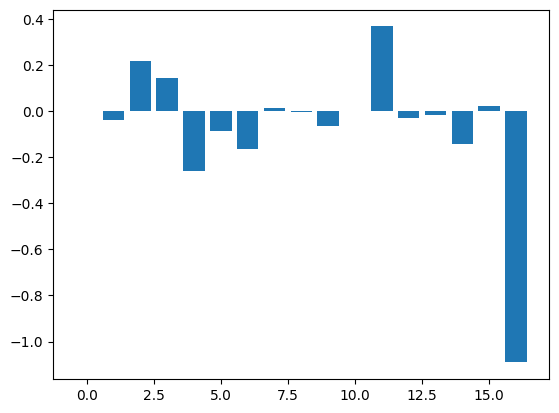

In [60]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    if importance[i] > 0.2 or importance[i] < -0.2:
        print('Feature: '+str(colname[i])+' n.%0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

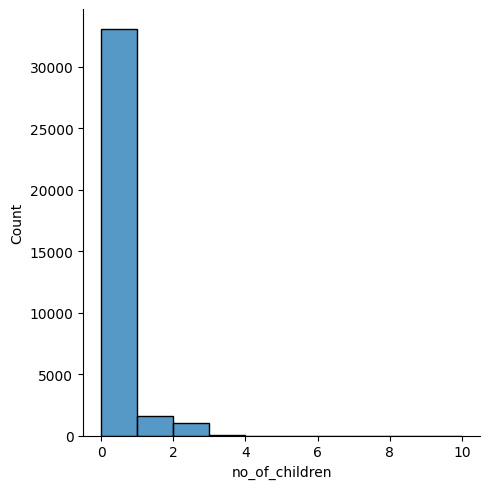

In [61]:
sns.displot(df['no_of_children'], binwidth=1)

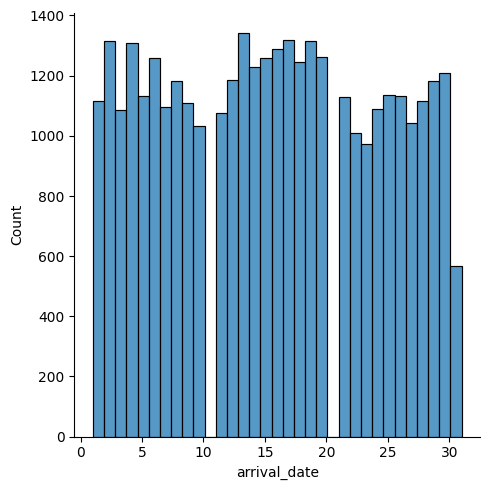

In [62]:
sns.displot(df['arrival_date'])

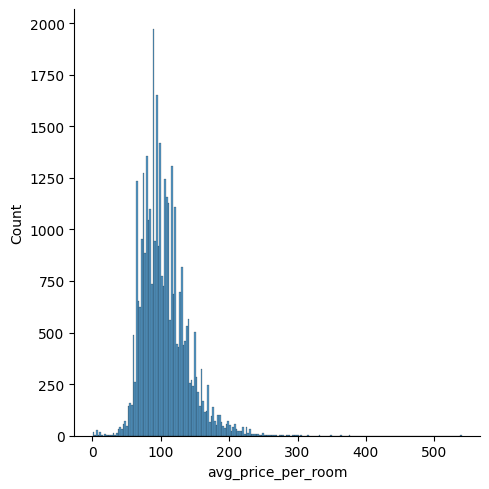

In [63]:
sns.displot(df['avg_price_per_room'])

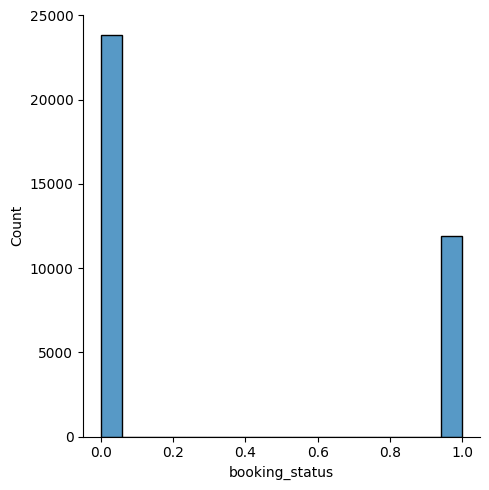

In [64]:
sns.displot(df['booking_status'])

In [65]:
df.to_csv('selected_features.csv',index=False)